# *What is the impact of employees moving from the private sector to the public sector?*

### Background

- On Peter Schiff's podcast, he often analyzes the jobs reports
    - If there's been a surge in the number of public sector employees, he often talks about how **these are not real jobs**
        - For every worker that transfers from the private sector to the public sector, there is:
            1. The reduction in gross tax revenues
            2. An increase in the cost of public sector salaries
     
- Some will argue that public sector employees pay taxes like everyone else
    - While this is true, it ignores the overall impact (since them paying taxes is simply the gov't getting a partial reimbursement on the salary paid)
 
- In this exercise, we want to:
    1. Create a simple example to outline the relationship
    2. See if there are any simple formulas to describe this

____

# Illustrative Example

- Let's say there are 100 workers total
    - Out of the 100 workers:
        - 90 work in the private sector
        - 10 work in the public sector
 
- Let's also assume everyone gets the same salary, and pays the same effective tax rate:
    - Salary: 50k
    - Effective Tax Rate: 30%

- Therefore:

$$
\text{Total Tax Revenue Collected} = \left ( \text{Total Tax Revenue from Private Sector} \right ) + \left ( \text{Total Tax Revenue from Public Sector} \right )
$$

$$
\text{Total Tax Revenue from Private Sector} = \left ( \text{Number of Private Sector Workers} \right ) \cdot \left ( \text{Salary} \right ) \cdot \left ( \text{Effective Tax Rate} \right )
$$

$$
= 90\cdot 50k \cdot 30\% = 1.35M
$$

$$
\text{Total Tax Revenue from Public Sector} = \left ( \text{Number of Public Sector Workers} \right ) \cdot \left ( \text{Salary} \right ) \cdot \left ( \text{Effective Tax Rate} \right )
$$

$$
= 10\cdot 50k \cdot 30\% = 150k
$$

$$
\text{Total Tax Revenue Collected} = 1.35M + 150k = 1.5M
$$

- Before we continue: *what do we notice?*
    - We didn't need to split the private and public sector workers
        - Since this example assumes equal tax rates and salaries, we can simplify the calculation to:
     
$$
\text{Total Tax Revenue Collected} = \left ( \text{Number of Workers} \right ) \cdot \left ( \text{Salary} \right ) \cdot \left ( \text{Effective Tax Rate} \right )
$$

- Next, we calculate the total cost of salaries for public sector employees

$$
\text{Total Cost of Public Sector Employees} = \left ( \text{Number of Public Sector Workers} \right ) \cdot \left ( \text{Salary} \right ) = 500k
$$

- As we can see, **1/3 of the total tax revenue is dedicated to public sector salaries**

_____

# Other Examples

- We'll loop through all the other possible values

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
n_workers = 100
avg_salary = 50000
tax_rate = 0.3
df = pd.DataFrame({"N Public Sector Employees": range(0, n_workers + 1)})
df["N Private Sector Employees"] = n_workers - df["N Public Sector Employees"]
df["Total Tax Revenue"] = n_workers * avg_salary * tax_rate
df["Cost of Public Sector Salaries"] = df["N Public Sector Employees"] * avg_salary
df["Share of Tax Revenues Consumed by Public Sector Salaries"] = df["Cost of Public Sector Salaries"] / df["Total Tax Revenue"]

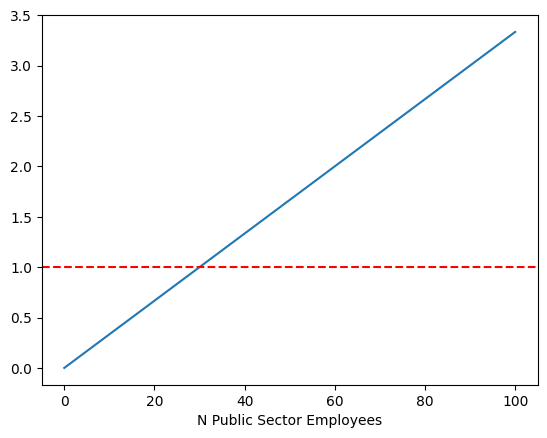

In [3]:
df.set_index("N Public Sector Employees")["Share of Tax Revenues Consumed by Public Sector Salaries"].plot()
plt.axhline(1, ls='dashed', c='r')

- As we can see for this example, once 30% of workers are employed by the public sector, 100% of the tax revenue is dedicated to paying their salaries

____

# General Formula

- The relationship between tax revenues and cost of salaries is:

$$
\text{Share of Tax Revenues Consumed by Public Sector Salaries} = \frac{\text{Cost of Salaries}}{\text{Total Tax Revenue}} = \frac{N \cdot p \cdot S}{N \cdot t \cdot S} = p / t
$$

- In the formula above:
    - $N$ is the number of workers (total i.e. private and public sector combined)
    - $p$ is the share of workers employed in the public sector
    - $S$ is the salary
    - $t$ is the tax rate

- Therefore, when $p/t = 1$, 100% of tax revenues are consumed by public sector salaries
    - $p/t = 1 \implies p = t$
        - So, **when $p > t$, the salaries cost more than the total tax revenue**

- Thinking about it in another way, when 1 employee transfers from the private sector to the public:
    - The cost increases by the full salary amount (50k)
    - The tax revenues stay the same
        - Therefore, the net effect is -50k
     
- We can show this using our dataframe

In [4]:
df["Cost of Public Sector Salaries"] - df["Cost of Public Sector Salaries"].shift(-1)

0     -50000.0
1     -50000.0
2     -50000.0
3     -50000.0
4     -50000.0
        ...   
96    -50000.0
97    -50000.0
98    -50000.0
99    -50000.0
100        NaN
Name: Cost of Public Sector Salaries, Length: 101, dtype: float64

_____

# Takeaways

1. The effective tax rate must exceed the share of the population working in the public sector
    - Otherwise, the gov't spends more on salaries than they collect in tax revenue
2. The net impact of a worker moving from the private sector to the public is a reduction in tax revenue equal to their salary